# Winer Filter Computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, istft, get_window
from scipy.fft import rfft, rfftfreq, irfft
import scipy

In [2]:
fs = 500  # Sampling frequency
# t = np.linspace(0, 1, fs, endpoint=False)
t = np.arange(0, 3, 1/fs)

# Signal

Text(0, 0.5, 'Amplitude')

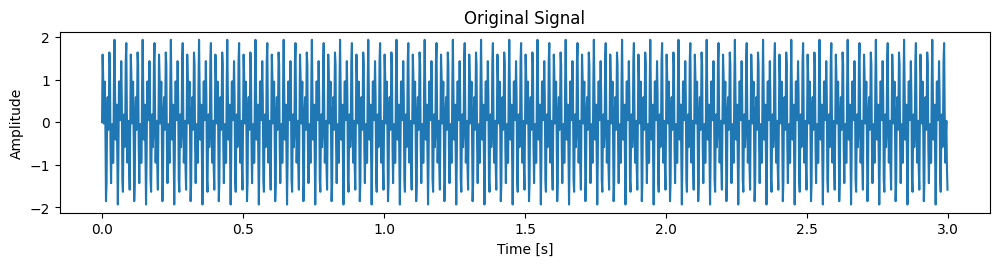

In [3]:
# Generate a sample signal (sine wave with noise)
original_signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
noisy_signal = original_signal + np.random.normal(0, 0.5, t.shape)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, original_signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# STFT

In [4]:
# Parameters for STFT
frame_size = 128
overlap = frame_size // 2
window = get_window('hann', frame_size)

# Compute STFT of noisy signal
f, _, Zxx = stft(noisy_signal, fs, window=window, nperseg=frame_size, noverlap=overlap)

# Winer Filter Computation

$$
H(f) = \frac {Sxx(f)}{Sxx(f) + Snn(f)}
$$

where $H(f)$ is the Wiener filter frequency response, $Sxx(f)$ is the power spectral density (PSD) of the noisy signal, and $Snn(f)$ is the PSD of the noise.


```
wiener_filter = noisy_signal_psd / (noisy_signal_psd + noise_psd_estimate[:, np.newaxis])
```

1. Numerator:
   *  ```noisy_signal_psd```: Ensures that the signal components are preserved proportionally to their power.
     
2. Denominator:
   * ```noisy_signal_psd + noise_psd_estimate[:, np.newaxis]```: Represents a balance between suppressing noise and preserving the signal. It adjusts the filter to reduce noise where the noise dominates and lets the signal pass through where the signal is strong.

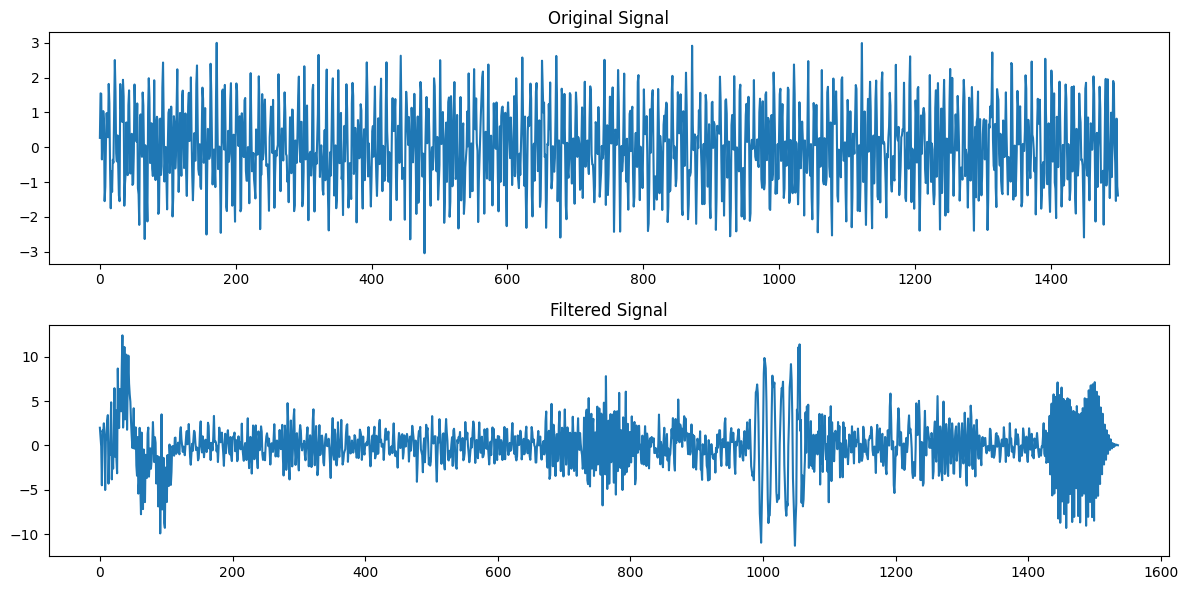

In [5]:
overlap = hop_size =  frame_size // 2     # Number of samples between frames
window_function = 'hann'  # Window function to apply to each frame
sample_rate = fs

# Perform STFT
f, _, Zxx = scipy.signal.stft(noisy_signal, fs=sample_rate, nperseg=frame_size, noverlap=hop_size, window=window_function)

# Compute magnitude and power spectral density (PSD)
magnitude = np.abs(Zxx)
noisy_signal_psd = 2 * magnitude**2 / np.sum(np.hanning(frame_size))

# Estimate noise PSD using Gaussian filter
sigma = 5  # Standard deviation for the Gaussian filter
noise_psd_estimate = scipy.ndimage.gaussian_filter(noisy_signal_psd, sigma=(0, sigma))

# Compute Wiener filter frequency response for each frame
wiener_filter = noisy_signal_psd / (noisy_signal_psd + noise_psd_estimate)

# Apply Wiener filter in the frequency domain
filtered_Zxx = Zxx * wiener_filter

# Compute inverse STFT to get the filtered signal
_t_istft, filtered_signal = scipy.signal.istft(filtered_Zxx, fs=sample_rate, window=window_function, nperseg=frame_size, noverlap=hop_size)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(noisy_signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Signal')

plt.tight_layout()
plt.show()


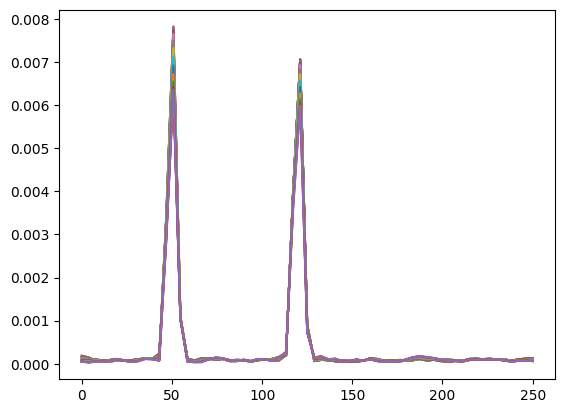

In [9]:
plt.plot(f, noisy_signal_psd - noise_psd_estimate)

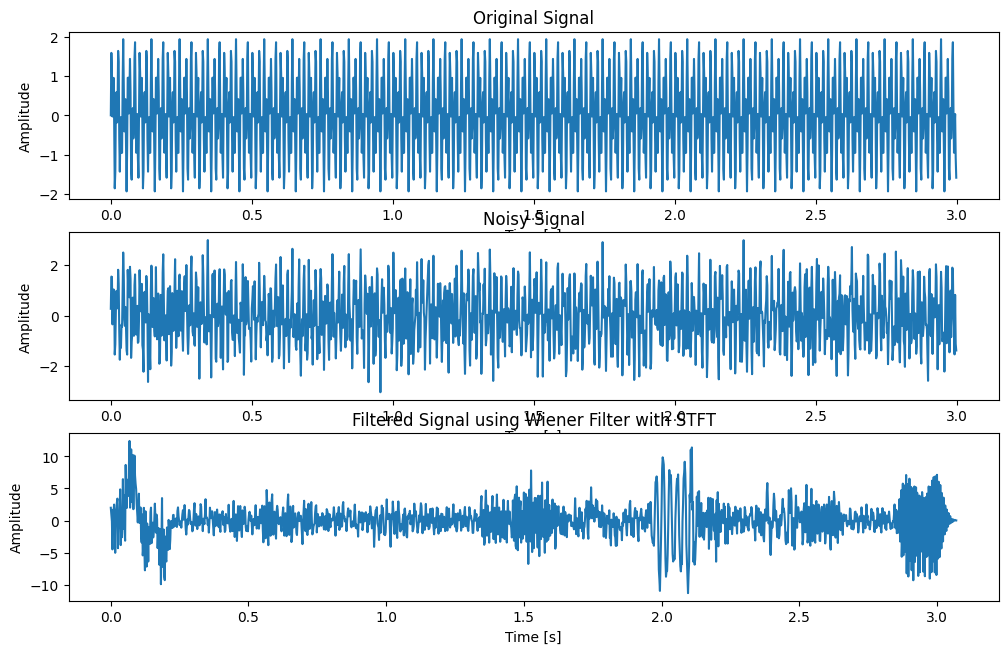

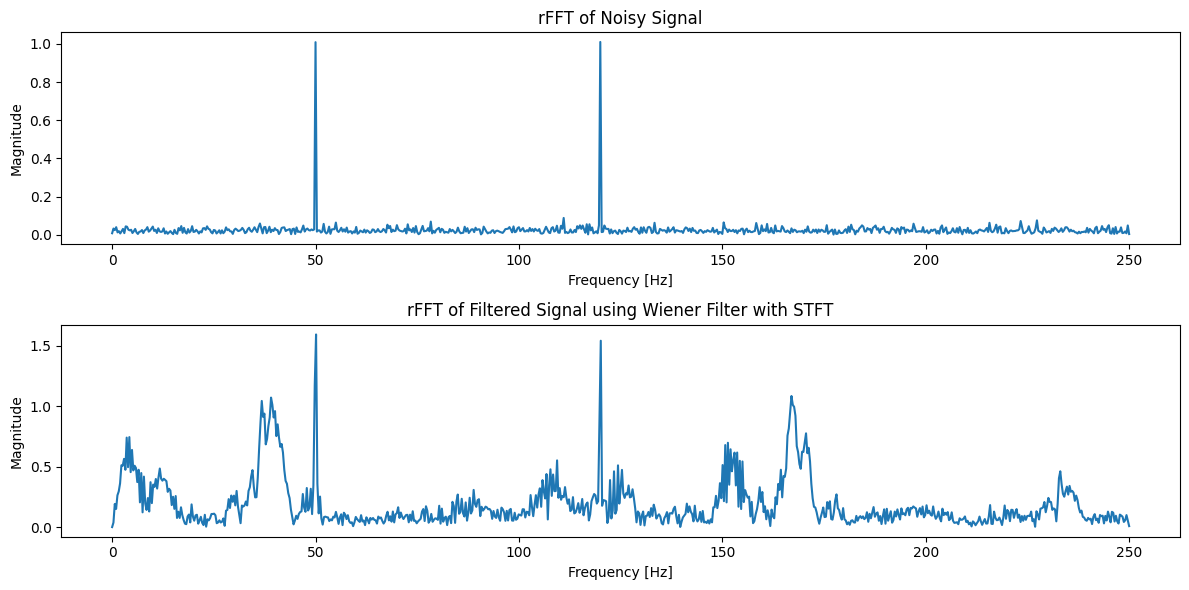

In [7]:

# Plot original, noisy, and filtered signals
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, original_signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(_t_istft, filtered_signal)
plt.title('Filtered Signal using Wiener Filter with STFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot rFFT of the noisy and filtered signals for comparison
noisy_signal_rfft = 2 * rfft(noisy_signal, norm="forward")
freqs = rfftfreq(len(noisy_signal), 1/fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(noisy_signal_rfft))
plt.title('rFFT of Noisy Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

filtered_signal_rfft = 2 * rfft(filtered_signal, norm="forward")
freqs = rfftfreq(len(filtered_signal), 1/fs)

plt.subplot(2, 1, 2)
plt.plot(freqs, 2 * np.abs(filtered_signal_rfft))
plt.title('rFFT of Filtered Signal using Wiener Filter with STFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()